In [1]:
# Make code toggle-able for easier review.
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<i>The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a></i>.''')

# Load & Check Data

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import math
from sklearn import linear_model
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm


import warnings

from IPython.display import display

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
# Acquire, load, and preview the data.
crime = pd.read_csv('/Users/guest/Dropbox/Education/Thinkful/Unit 2/L4 - Linear Regression/ny_crime_clean.csv')
display(crime.head())

,city,population_wins,population_sq,murder_cat,robbery_cat,property_crime_wins
0,Adams Village,1861.000,3463321.000,0,0,12.000
1,Addison Town and Village,2577.000,6640929.000,0,0,24.000
2,Akron Village,2846.000,8099716.000,0,0,16.000
3,Albany,57559.000,3313038481.000,1,1,1391.000
4,Albion Village,6388.000,40806544.000,0,1,223.000


<hr>
# Instantiate, Fit, and Inspect Model

In [4]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = crime['property_crime_wins'].values.reshape(-1, 1)
X = crime[['population_wins','population_sq','murder_cat', 'robbery_cat']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  1.16919705e-02   1.49358699e-07   8.81913051e+01   9.69363363e+01]]

Intercept: 
 [-11.66680196]

R-squared:
0.823536400001


<hr>
# Check Assumptions

### Assumption one: linear relationship

In [5]:
# Set variables
X_plot = ['population_wins','population_sq','murder_cat', 'robbery_cat']
Y_plot = 'property_crime_wins'

In [6]:
# Define the scatterplot function
def plot_scat(frame, X, Y):
    fig, axes = plt.subplots(1, len(X), figsize=(14,3))
    for var in X:
        idx = X.index(var)
        sns.regplot(y=frame[Y], x=frame[var], ax=axes[idx])

###### Scatterplots
All variables appear to have a linear relationship with property crime.

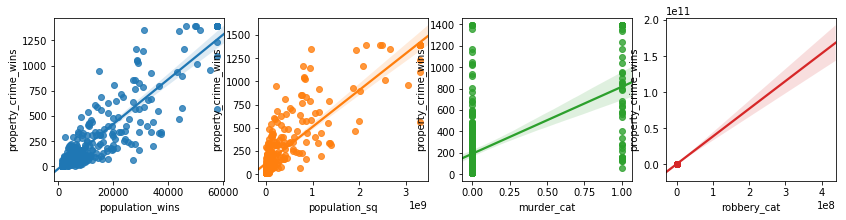

In [7]:
plot_scat(crime, X_plot, Y_plot)

##### Correlation Heatmap
All variables correlate with property crime.

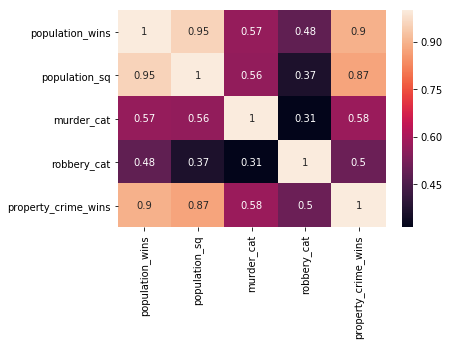

In [8]:
sns.heatmap(crime.corr(), annot=True)
plt.show()

###### Significance Testing
All variables have a significant relationship with property crime.

In [9]:
for var in X_plot:
    model = sm.OLS(crime[Y_plot], crime[var]).fit()
    predictions = model.predict(crime[var])
    print('\n\n' + var)
    print(model.summary())




population_wins
                             OLS Regression Results                            
Dep. Variable:     property_crime_wins   R-squared:                       0.872
Model:                             OLS   Adj. R-squared:                  0.872
Method:                  Least Squares   F-statistic:                     2374.
Date:                 Sun, 01 Jul 2018   Prob (F-statistic):          2.97e-157
Time:                         18:54:30   Log-Likelihood:                -2275.8
No. Observations:                  348   AIC:                             4554.
Df Residuals:                      347   BIC:                             4557.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
population_win

__SUMMARY:__ Linear relationships exist between each feature and the dependent variable.<br>

<hr>
### Assumption two: multivariate normality

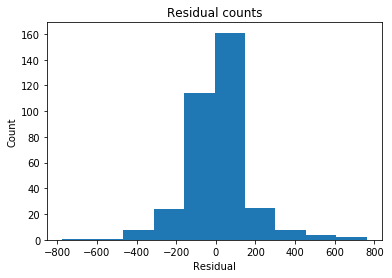

In [10]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = crime['property_crime_wins']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [11]:
# Define the histogram plotting function
def plot_hists(frame, vs):
    fig, axes = plt.subplots(1, len(vs), figsize=(14,3))
    for var in vs:
        idx = vs.index(var)
        frame.hist(var, ax=axes[idx])

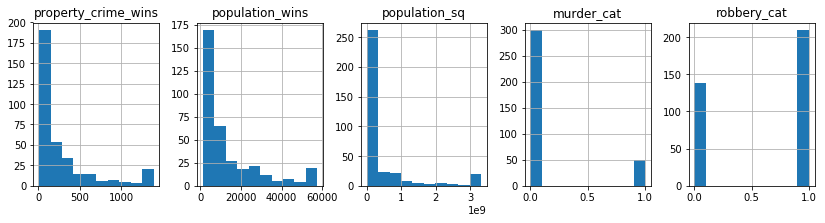

In [12]:
variables = ['property_crime_wins','population_wins','population_sq','murder_cat', 'robbery_cat']
plot_hists(crime, variables)

__SUMMARY:__ This looks okay – the distribution of residual counts is fairly normal.<br>

<hr>
### Assumption three: homoscedasticity

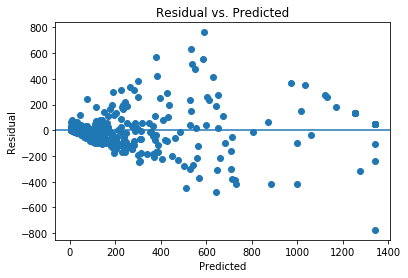

In [13]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

__SUMMARY:__ This looks pretty heteroscedastic and I don't know the best way to fix it – do you have any advice?<br>

<hr>
### Assumption four: low multicollinearity


Not a big concern – all I'm aiming for is predictive power.